<a href="https://colab.research.google.com/github/younghoonNa/pythonDT/blob/main/3%EC%A3%BC%EC%B0%A8_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D_%EC%95%84%ED%8C%8C%ED%8A%B8_%EC%8B%A4%EA%B1%B0%EB%9E%98%EA%B0%80_%EB%B6%84%EC%84%9D_II(%EB%82%98%EC%98%81%ED%9B%88).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [2]:
 !wget http://49.247.133.7/2020-seoul-apt-price-merge.csv

--2021-12-30 02:32:12--  http://49.247.133.7/2020-seoul-apt-price-merge.csv
Connecting to 49.247.133.7:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8483699 (8.1M) [text/csv]
Saving to: ‘2020-seoul-apt-price-merge.csv.1’

2020-seoul-apt-pric 100%[===================>]   8.09M  19.4MB/s    in 0.4s    

2021-12-30 02:32:12 (19.4 MB/s) - ‘2020-seoul-apt-price-merge.csv.1’ saved [8483699/8483699]



# 데이터 시각화

In [3]:
# 모듈 import
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
plt.rc('font', family='NanumBarunGothic') 

In [4]:
#visualization
import matplotlib as mpl
import matplotlib.pylab as plb
import matplotlib.pyplot as plt

# 브라우저에서 바로 그려지도록 
%matplotlib inline

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# 필요한 데이터를 읽어옵니다.
# 파일 이름은 '2020년 서울시 아파트 실거래가_merge.csv',
# encoding 옵션은 'cp949' 를 사용합니다.

#2020년 서울시 아파트 실거래가_merge
# df = pd.read_csv('2020년 서울시 아파트 실거래가_merge.csv', encoding = 'cp949') 왜 너는 에러가 뜰까...
#/content/drive/MyDrive/Colab Notebooks/2020년 서울시 아파트 실거래가_merge.csv
path = "/content/drive/MyDrive/2020년 서울시 아파트 실거래가_merge.csv"
df = pd.read_csv(path, encoding = 'cp949')
df.head()

,건축년도,거래년도,거래월,거래일자,법정동,거래금액,아파트이름,전용면적,지번,층,전용면적(평),반기,평당거래금액,시도명,시군구명
0,2007,2020,1,3,필운동,100000,신동아블루아광화문의 꿈,111.97,254,6,33.87,상반기,2952.465309,서울특별시,종로구
1,2008,2020,1,2,사직동,162000,광화문풍림스페이스본(106동),163.33,9-1,2,49.40,상반기,3279.352227,서울특별시,종로구
2,1994,2020,1,6,내수동,88000,세종로대우,109.91,167,11,33.25,상반기,2646.616541,서울특별시,종로구
3,2004,2020,1,9,내수동,130000,킹스매너,194.43,110-15,4,58.81,상반기,2210.508417,서울특별시,종로구
4,2003,2020,1,20,내수동,149000,경희궁 파크팰리스,148.09,95,8,44.79,상반기,3326.635410,서울특별시,종로구


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80951 entries, 0 to 80950
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   건축년도     80951 non-null  int64  
 1   거래년도     80951 non-null  int64  
 2   거래월      80951 non-null  int64  
 3   거래일자     80951 non-null  int64  
 4   법정동      80951 non-null  object 
 5   거래금액     80951 non-null  int64  
 6   아파트이름    80951 non-null  object 
 7   전용면적     80951 non-null  float64
 8   지번       80951 non-null  object 
 9   층        80951 non-null  int64  
 10  전용면적(평)  80951 non-null  float64
 11  반기       80951 non-null  object 
 12  평당거래금액   80951 non-null  float64
 13  시도명      80951 non-null  object 
 14  시군구명     80951 non-null  object 
dtypes: float64(3), int64(6), object(6)
memory usage: 9.3+ MB


In [8]:
df.head()

,건축년도,거래년도,거래월,거래일자,법정동,거래금액,아파트이름,전용면적,지번,층,전용면적(평),반기,평당거래금액,시도명,시군구명
0,2007,2020,1,3,필운동,100000,신동아블루아광화문의 꿈,111.97,254,6,33.87,상반기,2952.465309,서울특별시,종로구
1,2008,2020,1,2,사직동,162000,광화문풍림스페이스본(106동),163.33,9-1,2,49.40,상반기,3279.352227,서울특별시,종로구
2,1994,2020,1,6,내수동,88000,세종로대우,109.91,167,11,33.25,상반기,2646.616541,서울특별시,종로구
3,2004,2020,1,9,내수동,130000,킹스매너,194.43,110-15,4,58.81,상반기,2210.508417,서울특별시,종로구
4,2003,2020,1,20,내수동,149000,경희궁 파크팰리스,148.09,95,8,44.79,상반기,3326.635410,서울특별시,종로구


In [9]:
(df.groupby(['시군구명'])['거래금액'].mean()).reset_index().sort_values('거래금액', ascending=False)

,시군구명,거래금액
0,강남구,180523.977698
14,서초구,174519.395880
20,용산구,150769.459794
17,송파구,130369.219539
15,성동구,113725.468975
5,광진구,106791.559486
12,마포구,101252.816000
11,동작구,97487.289809
23,중구,92187.581466
19,영등포구,89657.699102


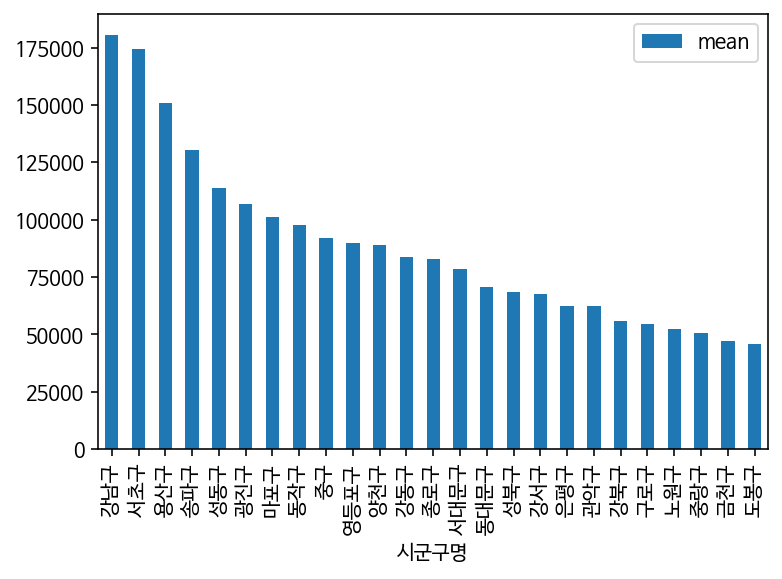

In [10]:
# groupby를 사용해서 시군구 별 총 거래금액의 평균을 구하고,
# 큰 순서대로 정렬해서 temp 변수에 저장합니다.
temp = df.groupby(by=['시군구명'])['거래금액'].agg(['mean']).sort_values(by='mean', ascending=False)

# 위의 temp 데이터를 bar차트로 시각화 합니다.
temp.plot(kind='bar')

In [12]:
# # 위의 temp 데이터를 bar차트로 시각화 합니다.
# plt.figure(figsize=(20, 15))
# plt.bar(temp['시군구명'], temp['거래금액'])

In [13]:
# 거래월과 시군구명을 기준으로 거래된 건수를 카운트하고,
# 거래된 수에 따라 내림차순으로 정렬해서 temp 변수에 저장하세요.
cnt = (df.groupby(['거래월','시군구명'])['거래금액'].agg(['size'])).sort_values('size', ascending=False)
cnt

size
거래월 시군구명      
6   노원구   1722
2   노원구   1154
6   송파구   1134
    강서구   1128
7   강서구    956
...        ...
3   용산구     37
4   중구      35
9   종로구     34
4   용산구     31
    종로구     27

[300 rows x 1 columns]

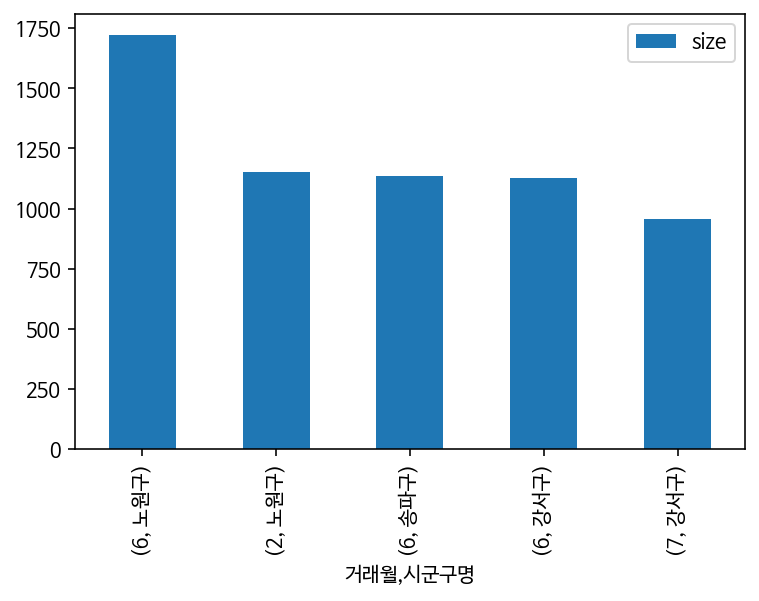

In [14]:
# 위 temp 데이터의 상위 5개 지역(거래 건수가 가장 높은 지역)을 시각화 합니다.\]
cnt.head().plot(kind='bar')
# plt.bar(cnt['시군구명'], cnt['거래금액'])

# 위 데이터의 상위 5개 지역을 시각화 합니다.
# temp.head(5).plot(kind='bar')

In [15]:
# 거래월과 시군구별 거래량(거래 건 수)을 피벗테이블로 표현하세요
pv_table = df.pivot_table(values='거래금액', index='시군구명', columns='거래월', aggfunc='mean')
pv_table = round(pv_table, 2)
pv_table

거래월,1,2,3,4,5,6,7,8,9,10,11,12
시군구명,,,,,,,,,,,,
강남구,155214.89,161472.14,170534.07,195801.03,170656.60,182113.90,169026.71,198072.78,184498.90,174962.29,184444.87,197931.10
강동구,65255.15,69415.66,63053.03,65905.51,70486.09,87377.73,87461.86,92148.44,92016.54,87667.95,96851.98,104075.85
강북구,46467.60,51212.21,53343.17,49934.85,51229.09,59997.04,60216.91,58783.16,64178.21,52543.44,60168.69,70411.71
강서구,62355.74,61398.25,57556.80,54620.90,62068.81,66513.39,68633.02,72645.76,72789.60,72637.85,76165.53,76454.49
관악구,57154.98,57703.31,56261.18,55616.12,55616.36,65763.32,61053.03,62855.60,64293.97,63991.80,69387.82,72498.94
광진구,93384.13,89947.79,93927.88,80750.00,92458.23,105991.27,109531.96,117256.45,121448.03,116535.42,111753.81,121891.80
구로구,50933.62,50332.53,48740.45,46793.23,49775.39,58070.79,61237.04,59327.82,57668.08,53159.19,50339.20,62308.34
금천구,47821.48,45375.95,36773.75,41611.13,45000.51,48519.74,50839.08,61443.82,54252.24,48936.57,59784.05,40210.31
노원구,46471.55,45885.92,46298.26,45767.12,47741.18,50326.27,56000.43,58932.60,60398.54,58041.77,61767.34,61089.38


In [16]:
# 피벗 테이블 이용하여 거래월과 시군구별 평균거래금액을 계산하고,
# temp 변수에 저장합니다.
temp = pv_table

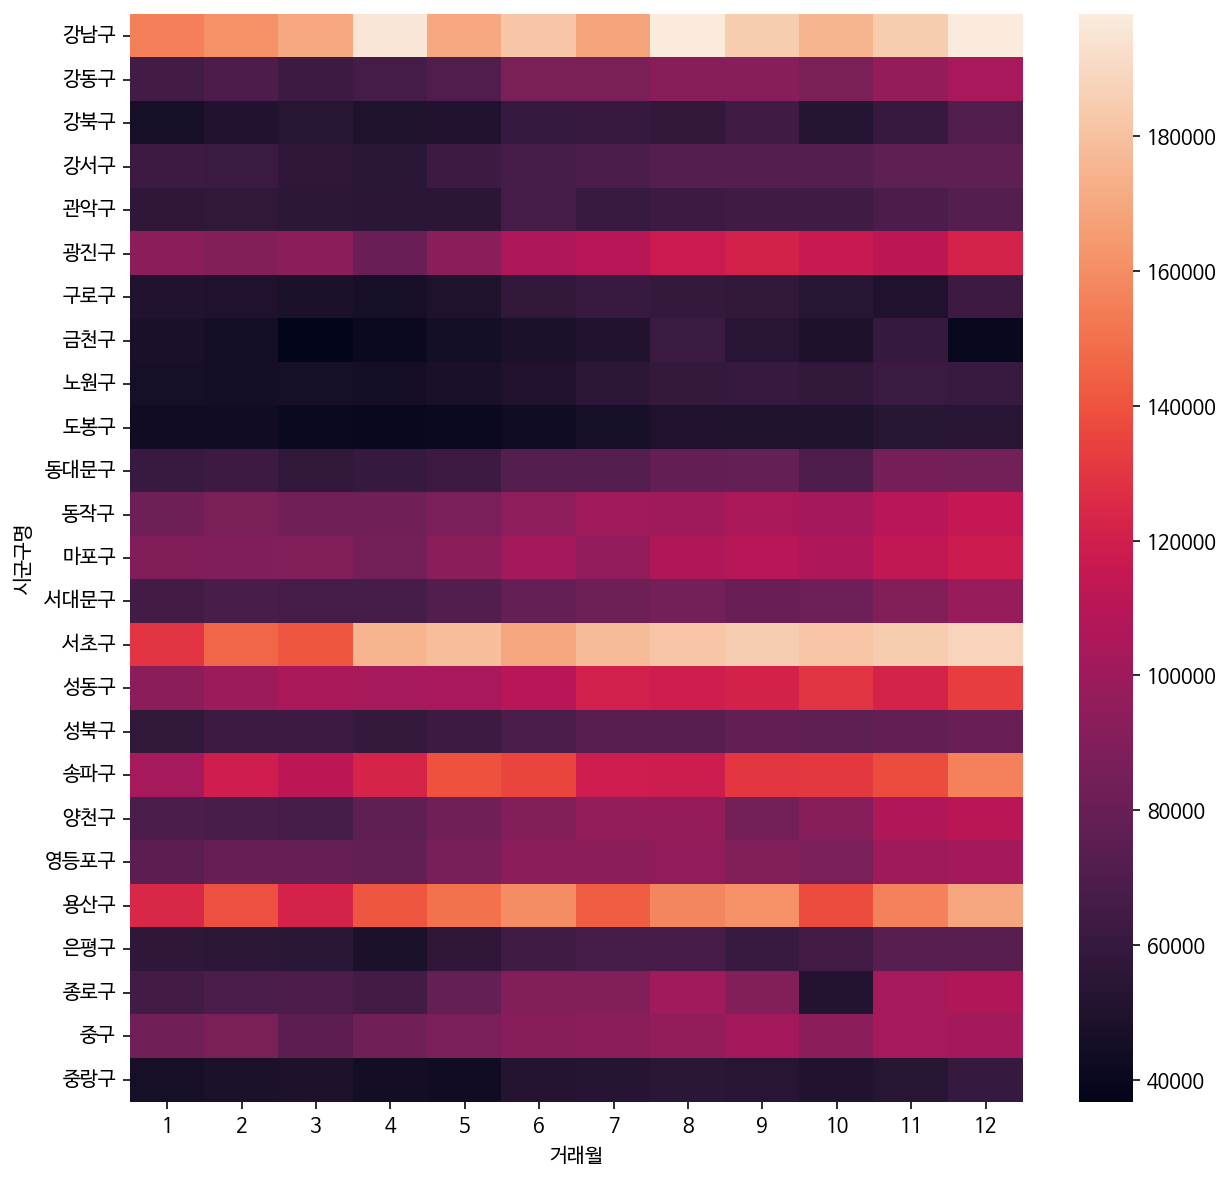

In [17]:
plt.figure(figsize=(10,10))

# 위 temp 데이터(평균거래금액)를 heatmap으로 시각화 합니다.
sns.heatmap(temp)

In [18]:
# 거래월과 시군구별 거래량(거래 건 수)을 피벗테이블로 생성하고,
# temp 변수에 저장합니다.
temp = df.pivot_table(index='시군구명',columns='거래월',values='거래금액',aggfunc='count')
temp

거래월,1,2,3,4,5,6,7,8,9,10,11,12
시군구명,,,,,,,,,,,,
강남구,131,237,135,145,331,789,365,227,177,215,418,462
강동구,336,392,165,127,317,871,558,314,200,195,328,340
강북구,313,262,161,99,132,371,207,95,78,122,107,158
강서구,425,459,247,188,327,1128,956,413,303,330,456,423
관악구,235,296,178,139,165,503,298,116,116,128,179,218
광진구,63,113,52,40,79,229,194,93,76,72,105,128
구로구,443,574,310,229,356,864,551,257,219,234,463,370
금천구,125,185,176,53,99,228,174,89,67,67,116,255
노원구,815,1154,625,371,621,1722,927,381,308,395,620,774


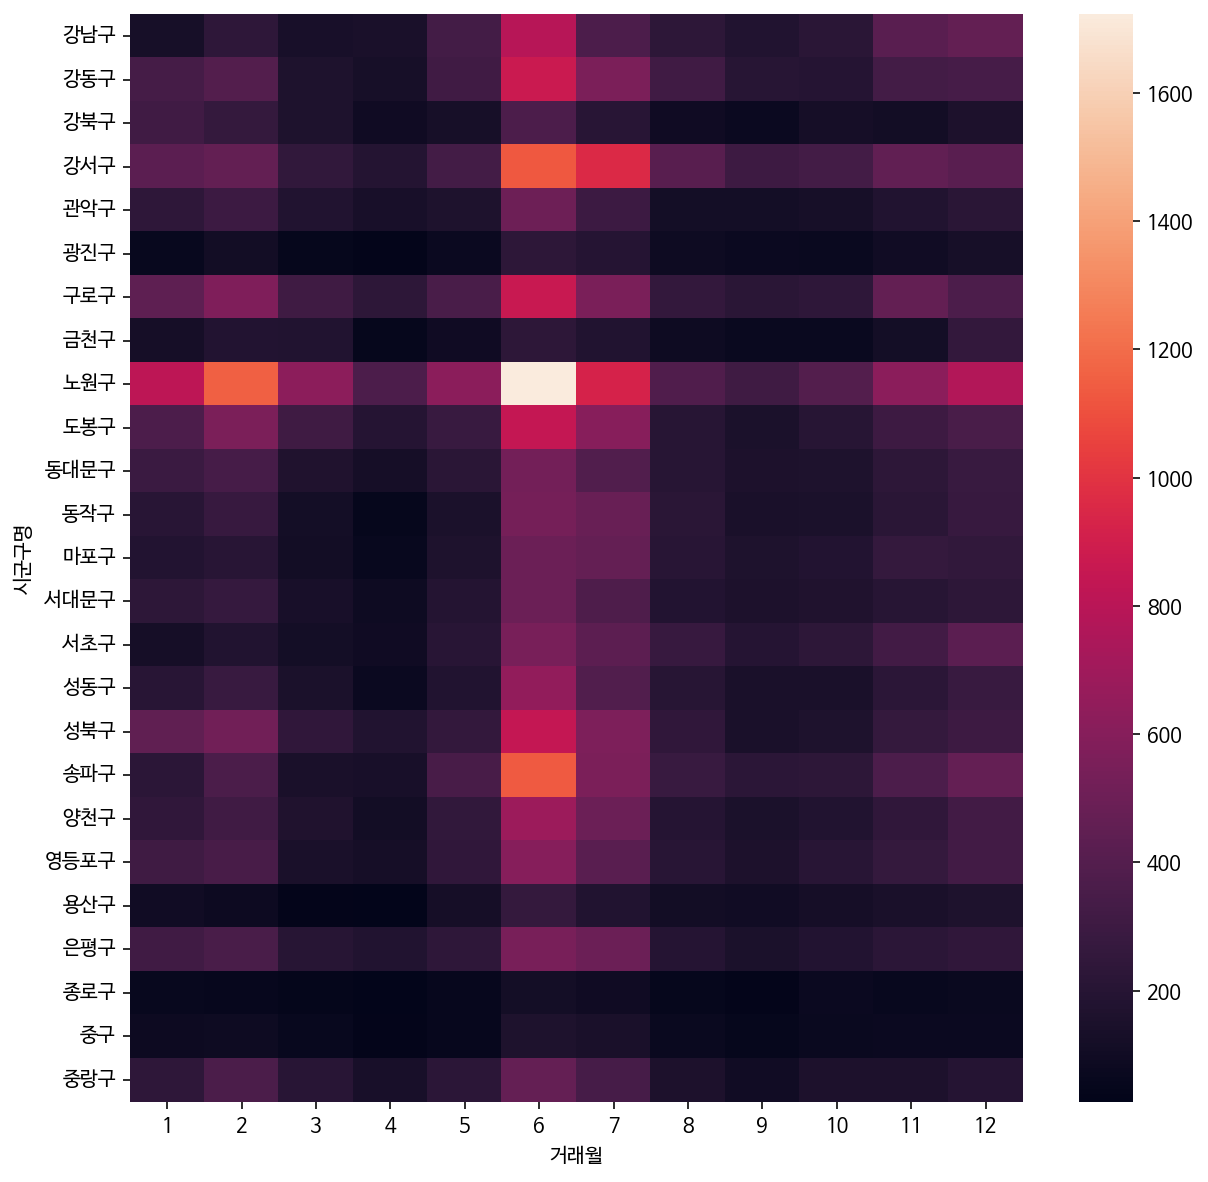

In [19]:
plt.figure(figsize=(10,10))
sns.heatmap(temp)
# 위 temp 데이터(거래량)를 heatmap으로 시각화 합니다.

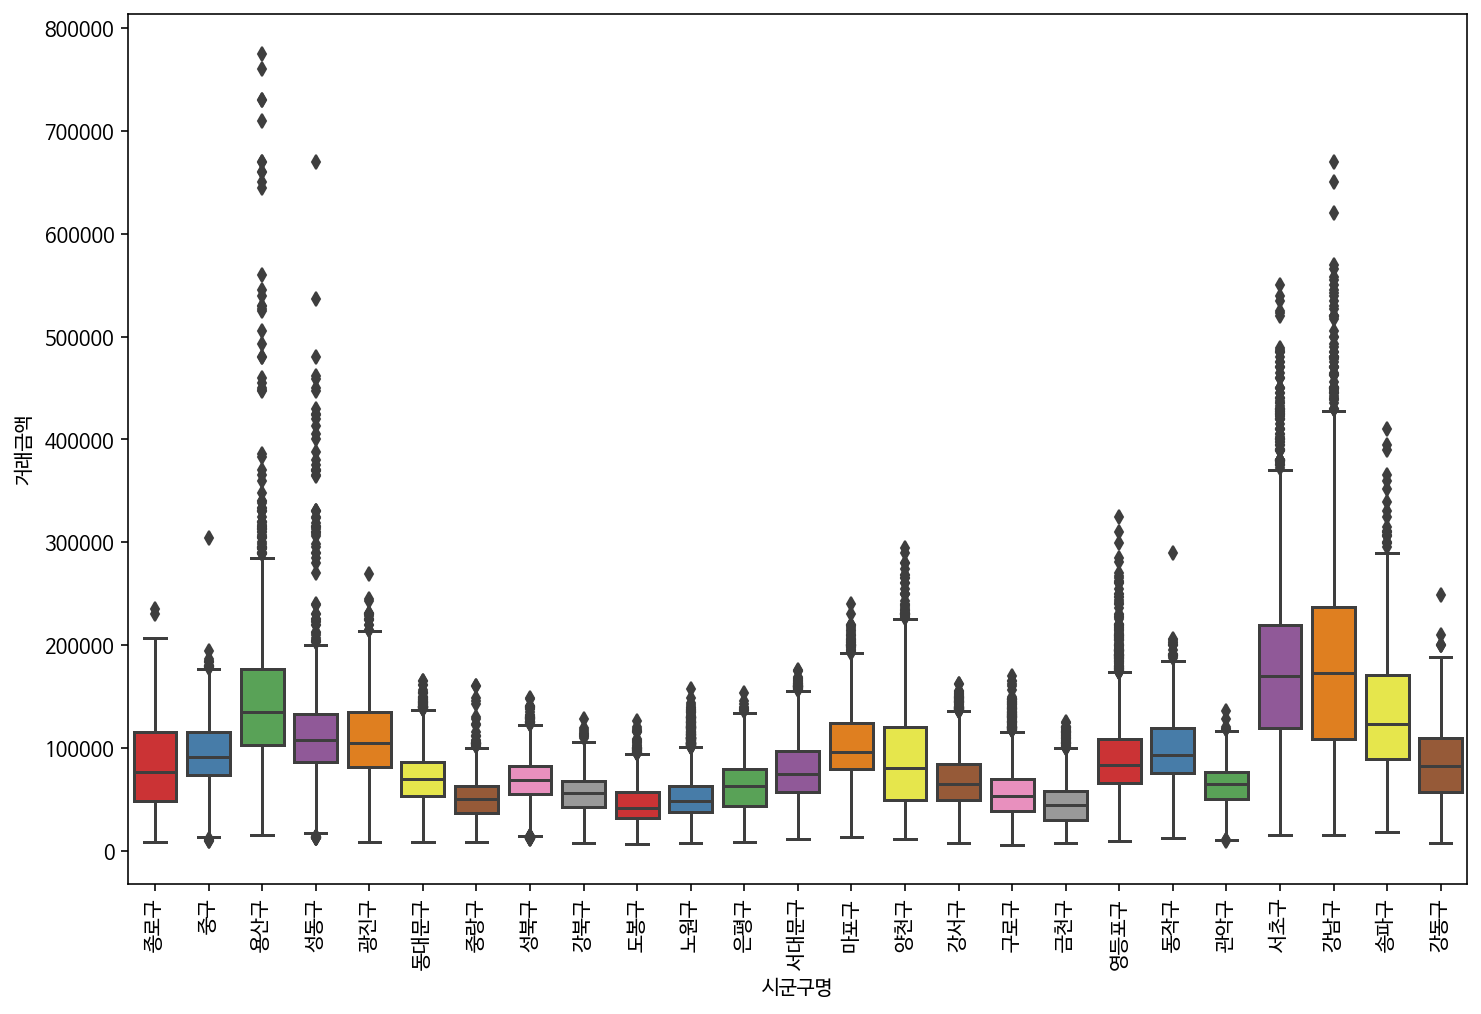

In [20]:
plt.figure(figsize=(12,8))
# 원본 데이터(df)의 시군구별 거래 금액을 boxplot을 이용하여 시각화 해보세요.
sns.boxplot(x="시군구명", y="거래금액", data=df, palette="Set1")

plt.xticks(rotation=90)
plt.show()

In [21]:
# 평균 거래 금액이 높은 상위 30개의 아파트 단지를 추출해서,
# temp 변수에 저장하세요.
temp = df.groupby('아파트이름')['거래금액'].agg(['mean']).sort_values('mean', ascending=False).head(30)
temp

,mean
아파트이름,
효성빌라 청담101(A동),620000.000000
상지리츠빌 카일룸,565400.000000
청담 어퍼하우스,519500.000000
한양8(81동한개동),491600.000000
아펠바움,480000.000000
로덴하우스 웨스트빌리지,471666.666667
한남더힐,470461.538462
삼성동라테라스,470000.000000
트라움하우스3,460000.000000


In [22]:
# 위에서 생성한 temp의 index만 추출해서,
# 평균 거래 금액이 높은 상위 30개의 아파트 이름을 뽑아냅니다.
apt_names = temp.index
apt_names

Index(['효성빌라 청담101(A동)', '상지리츠빌 카일룸', '청담 어퍼하우스', '한양8(81동한개동)', '아펠바움',
       '로덴하우스 웨스트빌리지', '한남더힐', '삼성동라테라스', '트라움하우스3', '레베빌', 'UPPER HOUSE 2',
       '논현라폴리움', '신현대11차', '현대7차(73~77,82,85동)', '현대2차(10,11,20,23,24,25동)',
       '압구정하이츠파크', '상지리츠빌카일룸(1009-4)', '로덴하우스 이스트빌리지', '상지리츠빌카일룸3차', '갤러리아 포레',
       '이니그마빌2', '현대1차(12,13,21,22,31,32,33동)', '반포 주공1단지', '레베빌(798-1)',
       '현대6차(78~81,83,84,86,87동)', '이니그마빌', '선데일', '대우로얄카운티3',
       '현대4차저층(51~56동)', '현대하이페리온II'],
      dtype='object', name='아파트이름')

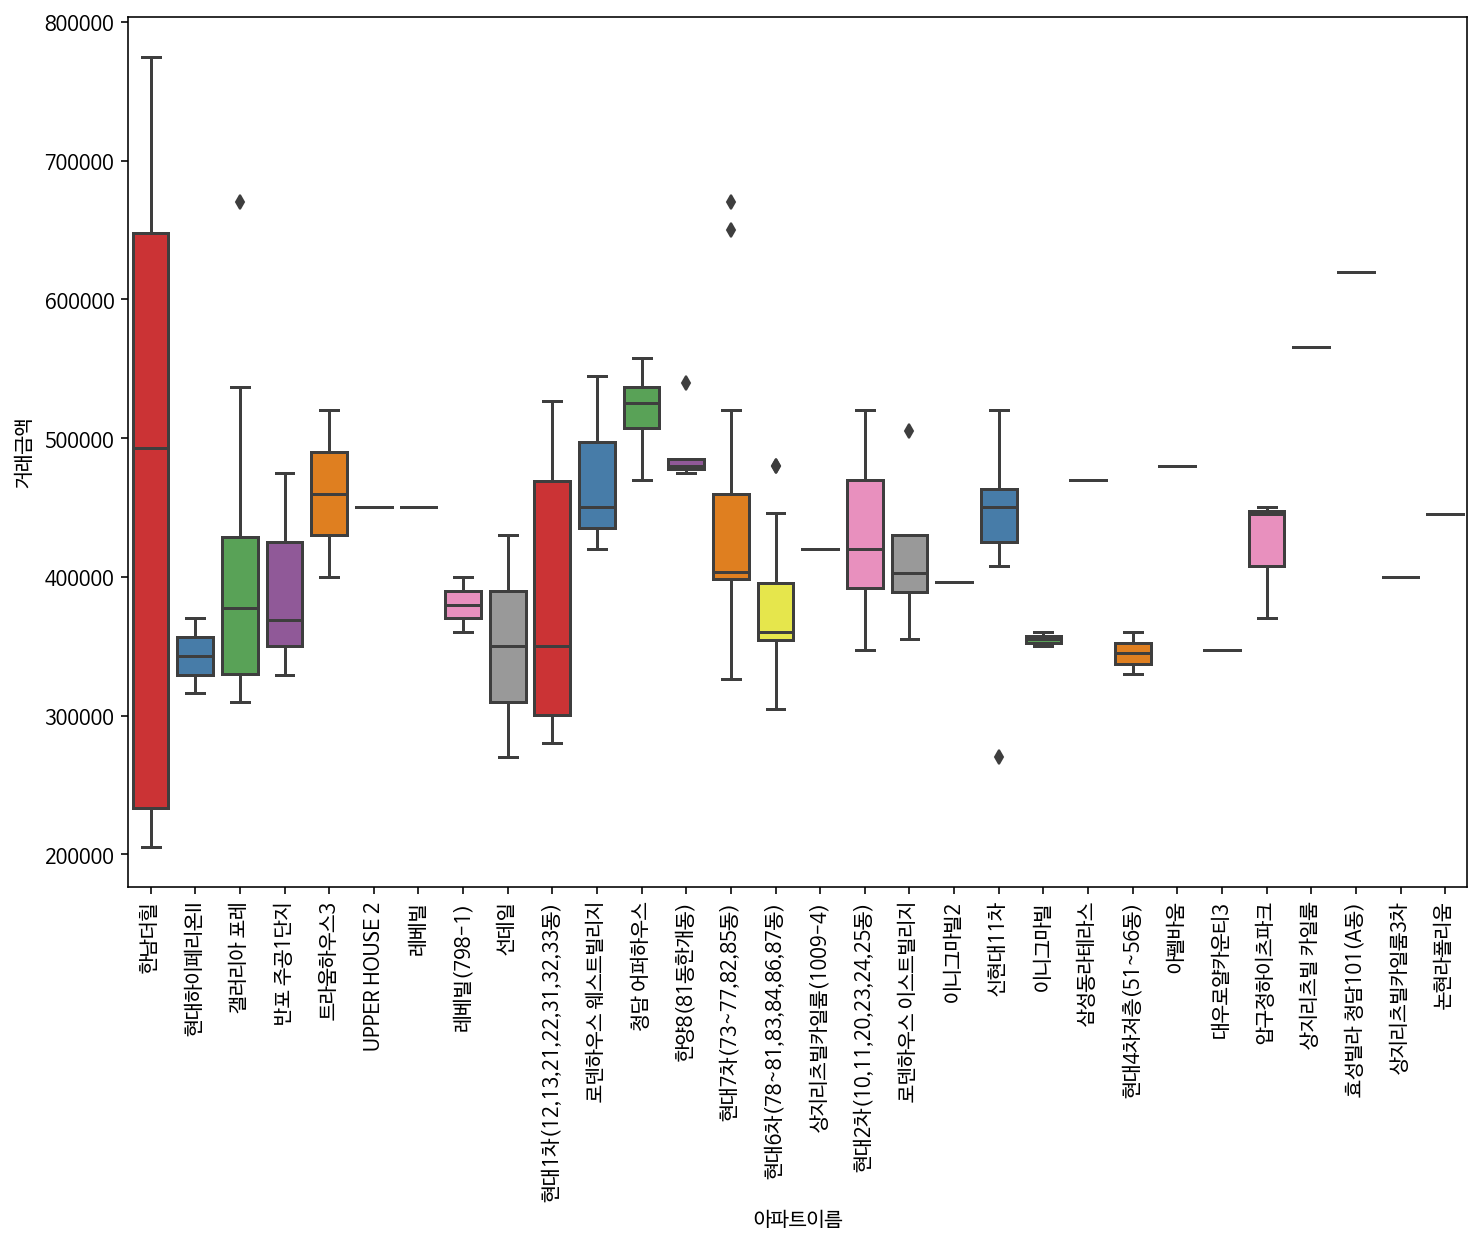

In [23]:
# 위에서 구한 아파트의 데이터만 추출해서 result 변수에 저장합니다.
result = df[df['아파트이름'].isin(apt_names)]

# 시각화
plt.figure(figsize=(12,8))

# 추출한 데이터의 아파트별 거래 금액의 분포를 boxplot를 통해 표현하세요.
sns.boxplot(x="아파트이름", y="거래금액", data=result, palette="Set1")

plt.xticks(rotation=90)
plt.show()